![](https://i.imgur.com/qQP7mg3.png)

# 1. Introduction

This notebook is just me being frustrated on **deep learning** and trying to understand in "baby steps" what is going on here. For somebody that starts in this area with no background whatsoever it can be very confusing, especially because I seem to be unable to find code with many explanations and comments.

So, if you are frustrated just like I was when I started this stuff I hope the following guidelines will help you. I am by no means a teacher, but in this notebook I will:
1. Share articles/videos I watched that TRULY helped
2. Explain code along the way to the best of my ability

<div class="alert alert-block alert-warning"> 
<strong>Note</strong>: Deep learning coding is VERY different in structure than the usual <em>sklearn</em> for machine learning. In addition, it usually works with <em>images</em> and <em>text</em>, while <em>ML</em> usually works with <em>tabular</em> data. So please, be patient with yourself and if you don't understand something right away, continue reading/ coding and it will all make sense in the end.
</div>

# 2. Before we start

> This is my first notebook in the "series": **How I taught myself Deep Learning**.
1. **[How I taught myself Deep Learning: ConvNet (CNNs)](https://www.kaggle.com/andradaolteanu/how-i-taught-myself-deep-learning-convnet-cnns)**
        * Why ConvNets
        * Convolutions Explained
        * Computing Activation Maps
        * Kernels, Padding, Stride
        * AlexNet
        * MNIST Classification using Convolutions
2. **[How I taught myself Deep Learning: Recurrent NNs](https://www.kaggle.com/andradaolteanu/how-i-taught-myself-deep-learning-recurrent-nns)**
        * 1 Layer RNNs
        * Multiple Neurons RNN
        * Vanilla RNN for MNIST Classification
        * Multilayer RNNs
        * Tanh Activation Function
        * Multilayer RNN for MNIST
        * LSTMs and Vanishing Gradient Problem
        * Bidirectional LSTMs
        * LSTM for MNIST Classification      

<img src='https://miro.medium.com/max/1200/1*4br4WmxNo0jkcsY796jGDQ.jpeg' width=200>
`Pytorch`: This is the library we will be using; it is allegedly much easier than `Keras` and it's starting to make a breakthrough nowadays. Pytorch has a *different structure* than the normal *machine learning* code in *sklearn*. So be aware!

`Tensors`: Instead of working with tabular data or `numpy` arrays, we'll be working with tensors. [A tensor is a container which can house data in N dimensions](https://www.kdnuggets.com/2018/05/wtf-tensor.html).

<img src='https://hadrienj.github.io/assets/images/2.1/scalar-vector-matrix-tensor.png' width='300'>

So, to not complicate ourselves, `tensors` are *very* similar with `numpy arrays`, but they offer much better GPU support, so they are faster. Let's take a look:

In [1]:
# Import torch
import torch

# Create some tensors
x = torch.empty(5, 3)
print(x, '\n')

y = torch.ones(5, 3, dtype=torch.long)
print(y, '\n')

z = torch.tensor([[0, 1, 2], [3, 4, 5]])
print(z)

tensor([[1.4587e-19, 1.1703e-19, 1.5637e-01],
        [2.9560e+21, 1.1286e+27, 1.7255e+25],
        [1.8523e+28, 1.2402e-14, 3.2487e+33],
        [5.8687e-02, 7.2443e+22, 1.3556e-19],
        [7.2053e+22, 4.7428e+30, 8.1717e-07]]) 

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]) 

tensor([[0, 1, 2],
        [3, 4, 5]])


# 3. What are Neural Networks?

## 3.1 Youtube Videos that will save you time:

There are 2 **super informative** videos on Youtube from *3Blue1Brown* that explain very well what neural networks are and what is an FNN: Feed Foward Neural Network. I **highly recommend** taking ~20 minutes and  watching them before going any further (it is always better to visualise than rather read to understand abstract concepts). 

<div class="alert alert-block alert-info">
<img src='https://upload.wikimedia.org/wikipedia/commons/b/ba/3B1B_Logo.png' width='50' align='left'></img>
<p><a href='https://www.youtube.com/watch?v=aircAruvnKk&t=1007s'>What are Neural Networks?</a></p>
<p><a href='https://www.youtube.com/watch?v=IHZwWFHWa-w'>How do Neural Networks learn?</a></p>
</div>

## 3.2 The Perceptron:

A **Perceptron** is a single layer neural network, while a **Multi Layer Perceptron** is called a Neural Network. 

I **highly suggest** reading [this blog post](https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53) for some very good explanations.

<img src = 'https://i.imgur.com/IHgw2au.png' width='400'>

## 3.3 How does a plain Vanilla Neural Network look?
Plain vanilla Neural Networks (or Feed Forward Neural Networks, FNNs for the lazy people 😎) have the most simple architecture in the Neural Networks realm, but their basics will help you understand much more complicated dinosaurs moving on.

> Pro Tip: Use [this site](http://alexlenail.me/NN-SVG/index.html) to construct your own FNN (it can be dreadful to draw lines by yourself).

<img src='https://i.imgur.com/wqHC1T4.png' width='600'>

We have 1 example of an FNN: our network is already trained to receive an B&W image and create the `output` 1 if the image is a cat and 0 otherwise. Therefore, the FNN is a Classifier. Let's break down the steps:
1. Input: An image of a cat with `height` = 10 pixels, `length` = 20 pixels and `channels` = 1 (because is B&W; for RGB images, the number of channels is 3).
2. The image (composed by numbers as you saw in the above videos) is therefore a matrix of shape `[1, 10, 20]`.
3. Layer1: Because the input in the FNN must be **linear**, the matrix is **vectorized** by reshaping it into a vector of size `[200]`.
4. Layer2: the first layer is multiplied by the weights and formes the second layer, composed by `[300]` neurons
5. Layer3: The last hidden layer is composed of `[400]` neurons
6. Output: It is composed of 1 single neuron, which **fires** the value 1 if the image is a cat or 0 otherwise.

## 3.4 Why so deep? Deep vs Shallow Networks

First of all, the FNN isn't really doing anything special that a simple ML can't achieve. The beauty in Deep Learning is actually the amount of data and computations that can be handled much better than in an usual ML algorithm.

In Feed Foward Neural Nets, the hidden layers gradually /increase/decrease in hidden size (number of neurons) so more and more **details** of the input (images, text etc.) can be grasped.

<img src='https://i.imgur.com/D8QhLWM.png' width=350>

It is known that Deep Neural Nets (thin and tall) are **better** than Shallow ones (fat and short). This happens because the deep ones can learn more and more abstract representations the *deeper* you go. Also, the number of parameters is smaller so the training is faster.

... Let's start programming.

# 4. The Data - MNIST

We'll be working in MNIST Dataset, which is usually the go-to dataset when starting in Neural Networks. Nevertheless, you can apply the following principles on any datasets (images, text, tabular data, audio data), as **all data can be represented in numbers**. Cuz this is just it: numbers.

In [2]:
# Imports
import torch
import torch.nn as nn                               # to access build-in functions to build the NN
import torch.nn.functional as F                     # to access activation functions
from torchvision import datasets, transforms        # to access the MNIST dataset
import torch.optim as optim                         # to build out optimizer

import numpy as np
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import seaborn as sns
import sklearn.metrics

In [3]:
# Load in the data from torchvision datasets 
# train=True to access training images and train=False to access test images
# We also transform to Tensors the images
mnist_train = datasets.MNIST('data', train = True, download = True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST('data', train = False, download = True, transform=transforms.ToTensor())

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


In [4]:
# How the object looks:
print('Structure of train data:', mnist_train, '\n')
print('Structure of test data:', mnist_test, '\n')
print('Image on index 0 shape:', list(mnist_train)[0][0].shape)
print('Image on index 0 label:', list(mnist_train)[0][1])

Structure of train data: Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 

Structure of test data: Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor() 



Image on index 0 shape: torch.Size([1, 28, 28])
Image on index 0 label: 5


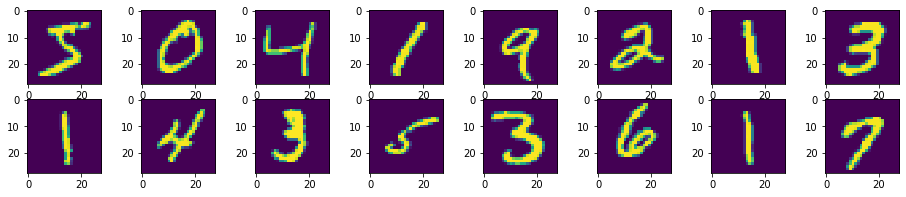

In [5]:
# Check a sample of the images
# We need to import again, because our train and test data are Tensors already
sample = datasets.MNIST('data', train=True, download=True)

plt.figure(figsize = (16, 3))
for k, (image, label) in enumerate(sample):
    if k >= 16:
        break
    plt.subplot(2, 8, k+1)
    plt.imshow(image)

# 5. Vanilla FNN Neural Network

When working with neural networks you actually NEED to define a class for yourself. For example, when you're building a `RandomForestClassifier()`, sklearn already has that made for you. So, you just *call* the object from the library and afterwards just fine tune the hyperparameters.

For Neural Networks is different: they can be so volatile, depending on the structure of your input (eg. an image of shape `[3, 500, 250]`), number of `hidden layers`, number of `neurons` in each hidden layer, weather or not you want to call the `Dropout()` functions etc. You can also build multiple neural networks and then combine them in another one (for example in a Sequence2Sequence RNN).

So, here we will create our own neural net:

>Note: you can ignore the `prints`, I usually put them to understand what the network does when you click *run*

> Note2: `super()` function is there because the `MNISTClassifier` class inherits attributes from it's parent class `nn.Module`. By calling this function we make this possible. Removing it would lead to an *error*.

In [6]:
# Creating the Network:
class MNISTClassifier(nn.Module):                           # nn.Module is a subclass from which we inherit
    def __init__(self):                                     # Here you define the structure
        super(MNISTClassifier, self).__init__()             
        self.layers = nn.Sequential(nn.Linear(28*28, 50),   # Create first layer: from 784 neurons to 50
                                    nn.ReLU(),              # Call activation function
                                    nn.Linear(50, 20),      # Second layer: from 50 neurons to 20
                                    nn.ReLU(),              # Call Activation function
                                    nn.Linear(20, 10))      # Last layer: from 20 neurons to 10
        # 10 because we have 10 categories of numbers from which we need to pick 1
        # If we would have wanted to classify images labeled "dog", "cat", "crocodile",
           # the final layer would have had 3 neurons.
        
    def forward(self, image, prints=False):                 # Function where you take the image though the FNN
        if prints: print('Image shape:', image.shape)
        image = image.view(-1, 28*28)                       # Flatten image: from [1, 28, 28] to [784]
        if prints: print('Image reshaped:', image.shape)
        out = self.layers(image)                            # Create Log Probabilities
        if prints: print('Out shape:', out.shape)
        
        return out

That was a lot. Please, bear with me.

## 5.1 Activation Functions
An activation function is a fancy way of saying that we are making the output of each neuron *nonlinear*, because we WANT to learn non-linear relationships between the input and the output.

There are maaany types of activation functions, but some of them are:

### Rectifier Linear Unit (ReLu)
The function is linear when the activation is above zero, and is equal to zero otherwise.
<img src="https://miro.medium.com/max/1026/0*g9ypL5M3k-f7EW85.png" width="350">

### Sigmoid
The sigmoid function has a tilted "S" shape, and its output is always between 0 and 1. They are *interpreted as probabilities* (probability of input to be digit 1, probability of input to be digit 2 etc.).
<img src="https://miro.medium.com/max/4000/1*JHWL_71qml0kP_Imyx4zBg.png" width="350">

### Tanh
A variation of the Sigmoid, but it outputs values between -1 and 1.
<img src="https://mathworld.wolfram.com/images/interactive/TanhReal.gif" width="300">

These Activation Functions squish the neuron's output between the 2 values, preventing big numbers becoming much bigger and small numbers becoming much smaller.

## 5.2 Making a Forward Pass

A forward pass is when you take the images one by one (or batch by batch, we'll come back to this) and we put them through the neural network, which outputs for each a log probability (10 in out case).

Let's look at 1 example:

<img src='https://i.imgur.com/ywMFtDz.png' width='600'>

In [7]:
torch.manual_seed(1) # set the random seed
np.random.seed(1) #set random seed in numpy

# Selecting 1 image with its label
image_example, label_example = mnist_train[0]
print('Image shape:', image_example.shape)
print('Label:', label_example, '\n')

# Creating an instance of the model
model_example = MNISTClassifier()
print(model_example, '\n')

# Creating the log probabilities
out = model_example(image_example, prints=True)
print('out:', out, '\n')

# Choose maximum probability and then select only the label (not the prob number)
prediction = out.max(dim=1)[1]
print('prediction:', prediction)

Image shape: torch.Size([1, 28, 28])
Label: 5 

MNISTClassifier(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=10, bias=True)
  )
) 

Image shape: torch.Size([1, 28, 28])
Image reshaped: torch.Size([1, 784])
Out shape: torch.Size([1, 10])
out: tensor([[-0.0371,  0.2867, -0.0227,  0.1967,  0.1084,  0.0576, -0.0036, -0.0246,
         -0.2160,  0.1166]], grad_fn=<AddmmBackward>) 

prediction: tensor([1])


The prediction is wrong! Keep in mind the model is NOT trained yet, so of course the prediction is not accurate.

## 5.3 Backpropagation

So, the purpose is to UPDATE the weights and biases in the neural network so it *learns* to recognize the digits and accurately classify them. This is done during backpropagation, when the model literally goes back and updates the parameters (weights) a little bit. Before going any further, I highly recommend watching the following video which explains the concept of Backpropagation.

<div class="alert alert-block alert-info">
<img src='https://upload.wikimedia.org/wikipedia/commons/b/ba/3B1B_Logo.png' width='50' align='left'></img>
<p><a href='https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3'>What is Backpropagation really doing?</a></p>
<p>Cheers again to 3Blue1Brown for his amazing structured videos.</p>
</div>

### 5.3.1 Loss and Optimizer Functions:

These 2 are like brother and sister: work hand in hand during the neural network training. They change by the case, but their main purpose is the same:

**Loss Function (`criterion`): given an output and an actual, it computes the difference between them**
* Regressive loss functions:
    * MAE: `torch.nn.L1Loss()`
    * MSE: `torch.nn.MSELoss()` etc.
* Classification loss functions:
    * Cross Entropy Loss: `torch.nn.CrossEntropyLoss()`
    * Binary Cross Entropy Loss: `torch.nn.BCELoss()` etc.
* Embedding Loss functions (whether 2 inputs are similar or not):
    * Hinge Loss: `torch.nn.HingeEmbeddingLoss()`
    * Cosine Loss: `torch.nn.CosineEmbeddingLoss()` etc.

**Optimizer Function (`torch.optim`): updates the weights and biases to REDUCE the loss**
* Examples:
    * Stochastic Gradient Descent: `SGD()`
    * Adam: `Adam()`
    * Adagrad: `Adagrad()`
    
Different neural networks and purposes can require different loss and optimizer functions. Click [here](https://pytorch.org/docs/stable/nn.html) to check all of them.

In [8]:
# Creating LOSS and Optimizer instances

# Loss is the function that calculates how far is the prediction from the true value
criterion = nn.CrossEntropyLoss()
print('Criterion:', criterion, '\n')

# Using this loss the Optimizer computes the gradients of each neuron and updates the weights
optimizer = optim.SGD(model_example.parameters(), lr=0.005, momentum=0.9)
print('Optimizer:', optimizer)

Criterion: CrossEntropyLoss() 

Optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.005
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


### 5.3.2 MNISTClassifier trainable parameters:
* 1 : torch.Size([50, 784]) - 50 weights (or parameters) for each 28x28 neurons (28x28x50 weights in total)
* 2 : torch.Size([50]) - 50 biases
* 3 : torch.Size([20, 50]) - 20 weights (or parameters) for each 50 neurons (50x20 weights in total)
* 4 : torch.Size([20]) - 20 biases
* 5 : torch.Size([10, 20]) - 10 weights (or parameters) for each 20 neurons (10x20 weights in total)
* 6 : torch.Size([10]) - value of the final neurons (the log probabilities)

In [9]:
# Let's also look at how many parameters (weights and biases) are updating during 1 single backpropagation
# Parameter Understanding
for i in range(6):
    print(i+1, ':', list(model_example.parameters())[i].shape)

1 : torch.Size([50, 784])
2 : torch.Size([50])
3 : torch.Size([20, 50])
4 : torch.Size([20])
5 : torch.Size([10, 20])
6 : torch.Size([10])


### 5.3.3 Do 1 backpropagation: Compute the LOSS and OPTIMIZE for our images_example:

In [10]:
torch.manual_seed(1) # set the random seed
np.random.seed(1) #set random seed in numpy

print('Log Probabilities:', out)
print('Actual value:', torch.tensor(label_example).reshape(-1))

# Clear gradients - always needs to be called before backpropagation
optimizer.zero_grad()
# Compute loss
loss = criterion(out, torch.tensor(label_example).reshape(-1))
print('Loss:', loss)
# Compute Gradients
loss.backward()
# Update weights
optimizer.step()

# After this 1 iteration the weights have updated once

Log Probabilities: tensor([[-0.0371,  0.2867, -0.0227,  0.1967,  0.1084,  0.0576, -0.0036, -0.0246,
         -0.2160,  0.1166]], grad_fn=<AddmmBackward>)
Actual value: tensor([5])
Loss: tensor(2.3000, grad_fn=<NllLossBackward>)


Until now we:
1. Created a Vanilla FNN
2. Took 1 image through the network and create prediction
3. Look at the prediction vs actual and computed the loss
4. Using the loss we updated the weights and biases

This is called training. The next chapters will be dedicated to training the network and improving it.

# 6. Training the Neural Network
Our purpose now that we have the structure in place and the data is to make the Vanilla FNN perform well.

## 6.1 Batches
With an artificial neural network, we may want to use more than one image at one time. That way, we can compute the *average* loss across a **mini-batch** of **multiple** images, and take a step to optimize the **average** loss. The average loss across multiple training inputs is going to be less "noisy" than the loss for a single input, and is less likely to provide "bad information" because of a "bad" input.

Batches can have different sizes:
* one extreme is `batch_size` = 1: meaning that we compute the loss and update after EACH image (so we have 60,000 batches of size 1)
* a `batch_size` = 60: means that, for 60,000 training images, we'll have 1000 batches of size 60
* the other extreme is `batch_size` = 60,000: when we input ALL images and do 1 backpropagation (we have 1 batch of size 60,000 images)

The actual batch size that we choose depends on many things. We want our batch size to be large enough to not be too "noisy", but not so large as to make each iteration too expensive to run.

<img src='https://i.imgur.com/M6ZkRXa.png' width='400'>

In the above example, instead of having 70 noisy losses we'll have just 7 averaged losses.

In [11]:
# Create trainloaders for train and test data
# We put shuffle=True so the images shuffle after every epoch
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=60, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=10, shuffle=True)

# Inspect Trainloader
print('trainloader object:', train_loader, '\n')

# Select First Batch
imgs, labels = next(iter(train_loader))

print('Object shape:', imgs.shape)      # [60, 1, 28, 28]: 60 images of size [1, 28, 28]
print('Label values:', labels)          # actual labels for the 60 images
print('Total Inages:', labels.shape)    # 60 labels in total

trainloader object: <torch.utils.data.dataloader.DataLoader object at 0x7fe4fc396cd0> 

Object shape: torch.Size([60, 1, 28, 28])
Label values: tensor([9, 3, 0, 1, 2, 4, 6, 8, 1, 1, 2, 3, 0, 7, 0, 0, 1, 3, 9, 4, 1, 1, 2, 9,
        0, 0, 1, 4, 6, 2, 1, 3, 0, 8, 8, 1, 9, 5, 9, 0, 2, 8, 7, 2, 9, 5, 7, 1,
        4, 1, 8, 6, 1, 8, 7, 0, 1, 3, 4, 3])
Total Inages: torch.Size([60])


### 6.1.1 Training the Example Network on a batch instead of image by image:

In [12]:
torch.manual_seed(1) # set the random seed
np.random.seed(1) #set random seed in numpy

n = 0
for k, (images, labels) in enumerate(train_loader):
    # Stop after 3 iterations
    if k >= 3:
        break
    
    print('========== Batch', k, ':')
    # Prediction:
    out = model_example(images)
    print('out shape:', out.shape)
    
    # Update weights (or parameters):
    loss = criterion(out, labels)
    print('loss:', loss)
    
    print('Optimizing...')
    # Computes the gradient of current tensor
    loss.backward()
    # Performs a single optimization step.
    optimizer.step()
    # Clears the gradients of all optimized
    optimizer.zero_grad()
    print('Done.')    
    
    if k<2: print('\n')

========== Batch 0 :
out shape: torch.Size([60, 10])
loss: tensor(2.2846, grad_fn=<NllLossBackward>)
Optimizing...
Done.


========== Batch 1 :
out shape: torch.Size([60, 10])
loss: tensor(2.3048, grad_fn=<NllLossBackward>)
Optimizing...
Done.


========== Batch 2 :
out shape: torch.Size([60, 10])
loss: tensor(2.2765, grad_fn=<NllLossBackward>)
Optimizing...
Done.


## 6.2 Accuracy of the Classifier
During Training, we would usually want to check for the accuracy of the model, to see how good or how bad is performing.

<div class="alert alert-block alert-warning"> 
<strong>Note</strong>: During <strong>training</strong>, it is highly important to set the model into training mode by calling <code>your_model.train()</code>. This enables gradients training, the Dropout() function etc. When you <strong>evaluate</strong> the model call <code>your_model.eval()</code>. This disables the gradients, Dropout() function etc and sets the model in evaluation mode.
</div>

In [13]:
# Instantiate 2 variables for total cases and correct cases
correct_cases = 0
total_cases = 0

# Sets the module in evaluation mode (VERY IMPORTANT)
model_example.eval()

for k, (images, labels) in enumerate(train_loader):
    # Just show first 3 batches accuracy
    if k >= 3: break
    
    print('==========', k, ':')
    out = model_example(images)
    print('Out:', out.shape)
    
    # Choose maximum probability and then select only the label (not the prob number)
    prediction = out.max(dim = 1)[1]
    print('Prediction:', prediction.shape)
    
    # Number of correct cases - we first see how many are correct in the batch
            # then we sum, then convert to integer (not tensor)
    correct_cases += (prediction == labels).sum().item()
    print('Correct:', correct_cases)
    
    # Total cases
    total_cases += images.shape[0]
    print('Total:', total_cases)
    
    
    if k < 2: print('\n')
        

print('Average Accuracy after 3 iterations:', correct_cases/total_cases)

========== 0 :
Out: torch.Size([60, 10])
Prediction: torch.Size([60])
Correct: 3
Total: 60


========== 1 :
Out: torch.Size([60, 10])
Prediction: torch.Size([60])
Correct: 10
Total: 120


========== 2 :
Out: torch.Size([60, 10])
Prediction: torch.Size([60])
Correct: 17
Total: 180
Average Accuracy after 3 iterations: 0.09444444444444444


## 6.3 Iterations vs Epochs:

**Iterations**: number of iterations is the number of times we *update* the weights (parameters) of the FNN. For example, above we did 3 iterations.

**Epoch**: number of times *all* training data was used once to update the parameters. This is used because, in general, we would want to train the network for longer. Until now in this notebook we haven't completed yet a full epoch.

## 6.4 Predefined Functions: Accuracy and Training Loop
Now let's create some functions, so our trainin process will become easier:

### 6.4.1 Predefined Accuracy Function:

In [14]:
def get_accuracy(model, data, batchSize = 20):
    '''Iterates through data and returnes average accuracy per batch.'''
    # Sets the model in evaluation mode
    model.eval()
    
    # Creates the dataloader
    data_loader = torch.utils.data.DataLoader(data, batch_size=batchSize)
    
    correct_cases = 0
    total_cases = 0
    
    for (images, labels) in iter(data_loader):
        # Is formed by 20 images (by default) with 10 probabilities each
        out = model(images)
        # Choose maximum probability and then select only the label (not the prob number)
        prediction = out.max(dim = 1)[1]
        # First check how many are correct in the batch, then we sum then convert to integer (not tensor)
        correct_cases += (prediction == labels).sum().item()
        # Total cases
        total_cases += images.shape[0]
    
    return correct_cases / total_cases

### 6.4.2 Predefined Training Function

<img src='https://i.imgur.com/S1miUl0.png' width=600>

In [15]:
def train_network(model, train_data, test_data, batchSize=20, num_epochs=1, learning_rate=0.01, weight_decay=0,
                 show_plot = True, show_acc = True):
    
    '''Trains the model and computes the average accuracy for train and test data.
    If enabled, it also shows the loss and accuracy over the iterations.'''
    
    print('Get data ready...')
    # Create dataloader for training dataset - so we can train on multiple batches
    # Shuffle after every epoch
    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batchSize, shuffle=True)
    
    # Create criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)
    
    # Losses & Iterations: to keep all losses during training (for plotting)
    losses = []
    iterations = []
    # Train and test accuracies: to keep their values also (for plotting)
    train_acc = []
    test_acc = []
    
    print('Training started...')
    iteration = 0
    # Train the data multiple times
    for epoch in range(num_epochs):
        
        for images, labels in iter(train_loader):
            # Set model in training mode:
            model.train()
            
            # Create log probabilities
            out = model(images)
            # Clears the gradients from previous iteration
            optimizer.zero_grad()
            # Computes loss: how far is the prediction from the actual?
            loss = criterion(out, labels)
            # Computes gradients for neurons
            loss.backward()
            # Updates the weights
            optimizer.step()
            
            # Save information after this iteration
            iterations.append(iteration)
            iteration += 1
            losses.append(loss)
            # Compute accuracy after this epoch and save
            train_acc.append(get_accuracy(model, train_data))
            test_acc.append(get_accuracy(model, test_data))
            
    
    # Show Accuracies
    # Show the last accuracy registered
    if show_acc:
        print("Final Training Accuracy: {}".format(train_acc[-1]))
        print("Final Testing Accuracy: {}".format(test_acc[-1]))
    
    # Create plots
    if show_plot:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.title("Loss Curve")
        plt.plot(iterations[::20], losses[::20], label="Train", linewidth=4, color='#008C76FF')
        plt.xlabel("Iterations")
        plt.ylabel("Loss")

        plt.subplot(1,2,2)
        plt.title("Accuracy Curve")
        plt.plot(iterations[::20], train_acc[::20], label="Train", linewidth=4, color='#9ED9CCFF')
        plt.plot(iterations[::20], test_acc[::20], label="Test", linewidth=4, color='#FAA094FF')
        plt.xlabel("Iterations")
        plt.ylabel("Accuracy")
        plt.legend(loc='best')
        plt.show()

# 7. Model Evaluation

Now that we have our functions ready, we can start training on the ENTIRE dataset.

But first, to make the training faster, we will:
* select 500 training images and 500 testing images
* `batch_size` will be by default set to 20 images/batch
* we'll iterate through the data 200 times (`num_epochs`=200)

Get data ready...
Training started...
Final Training Accuracy: 1.0
Final Testing Accuracy: 0.772


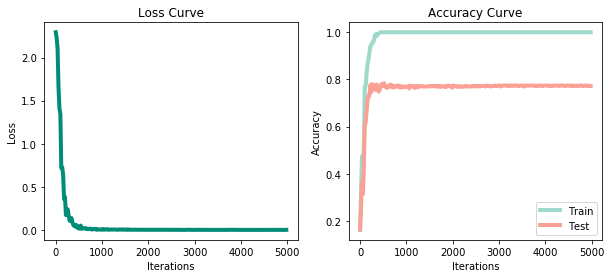

In [16]:
# Select images
mnist_data = datasets.MNIST('data', train = True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)

# Training and Testing selection
mnist_train = mnist_data[:500]     # 500 training images
mnist_test = mnist_data[500:1000]  # 500 test images

# Create Model Instance
model1 = MNISTClassifier()

# Train...
train_network(model1, mnist_train, mnist_test, num_epochs=200)

# 8. Overfitting

As any other Machine Learning Model, Neural Nets can suffer from overfitting. Overfitting is when a neural network model learns about the quirks of the training data, rather than information that is generalizable to the task at hand.

## 8.1 Data Augmentation
Why try to collect more data when you can create some on your own? *Data Augmentation* generates more data points from our existing data set by:
* Flipping each image horizontally or vertically (won't work for digit recognition, but might for other tasks)
* Shifting each pixel a little to the left or right
* Rotating the images a little
* Adding noise to the image

<img src='https://www.kdnuggets.com/wp-content/uploads/cats-data-augmentation.jpg' width='400'>

For our example we'll rotate the images randomly up to 35 degrees.

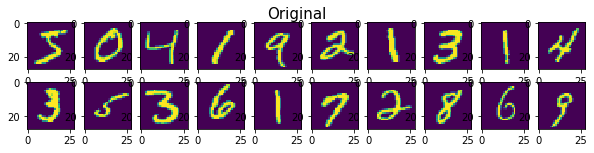

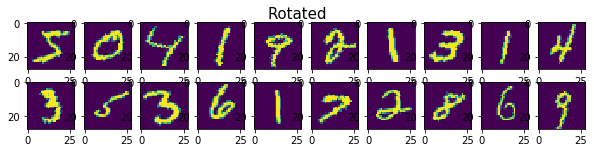

In [17]:
# Predefined Function that shows 20 images
def show20(data, title='Default'):
    plt.figure(figsize=(10,2))
    for n, (image, label) in enumerate(data):
        if n >= 20:
            break
        plt.subplot(2, 10, n+1)
        plt.imshow(image)
        plt.suptitle(title, fontsize=15);
        

# Create original and rotated set
original_images = datasets.MNIST('data', train=True, download=True)
rotated_images = datasets.MNIST('data', train=True, download=True, 
                                transform=transforms.RandomRotation(25, fill=(0,)))

#Show images
show20(original_images, 'Original')
show20(rotated_images, 'Rotated')

### 8.1.1 Training on Augmented Data:

* `transforms.Normalize()`: means to scale the input features of a neural network, so that all features are scaled similarly. For images is not really necessary, as they all have the same structure, but I threw it here just for reference.

Get data ready...
Training started...
Final Training Accuracy: 1.0
Final Testing Accuracy: 0.684


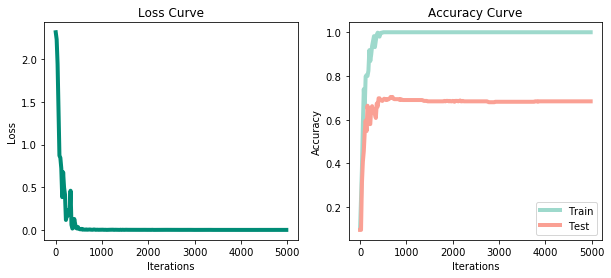

In [18]:
# Creating a personalized transform
# First Rotates, then transforms to tensor, then normalizes the images
mytransform = transforms.Compose([transforms.RandomRotation(25, fill=(0,)),
                                  transforms.ToTensor(),
                                 transforms.Normalize([0.5], [0.5])])

# Import the MNIST data aplying the transformations
mnist_data_aug = datasets.MNIST('data', train = True, download=True, transform=mytransform)
mnist_data_aug = list(mnist_data_aug)

# We select first 500 images as our training
mnist_train_aug = mnist_data_aug[:500]

# ------ Training the model ------
# Create Model Instance
model_aug = MNISTClassifier()

# Train...
train_network(model_aug, mnist_train_aug, mnist_test, num_epochs=200)

## 8.2 Weight Decay and Learning Rate

**Weight Decay**: The idea of weight decay is to *penalize large weights*. Large weights mean that the prediction relies heavily on the content of one or multiple pixels. So, we penalize them by adding and extra term to the `criterion` function.

**Learning Rate**: This one is probably not new. In FNNs we train using gradient descent to update the weights. The learning rate *controls* [how much to change the model in response to the estimated error each time the model weights are updated](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/). If we choose a lr too large we might overshoot the local minima, while using a lr too small we might wait longer for the model to train, as the steps are tinier.

<img src='https://srdas.github.io/DLBook/DL_images/TNN2.png' width='400'>

Get data ready...
Training started...
Final Training Accuracy: 1.0
Final Testing Accuracy: 0.774


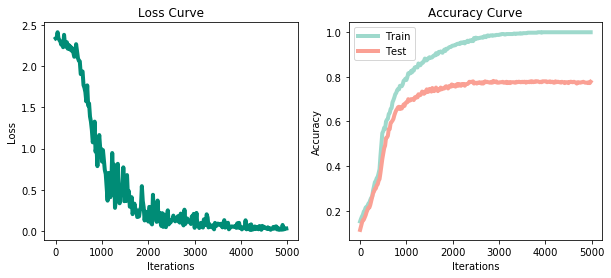

In [19]:
# Create Model Instance
model2 = MNISTClassifier()

# Train...
train_network(model2, mnist_train, mnist_test, num_epochs=200, learning_rate=0.001, weight_decay=0.0005)

## 8.3 Dropout() and Layer Optimization

### 8.3.1 Dropout() Function
This technique builds *many* models and then averages their prediction at test time (this is why it is very important to call `model.eval()` when we want to evaluate).

For each model we **dropout** (drop out, zero out, remove etc.) a portion of neurons from each training iteration. Hence, in different iterations of training, we will drop out a different set of neurons.

This way we prevent the weight from being overly dependent on eachother: for example for one weight to be unnecessarily large to compensate for another unnecessarily large weight with the opposite sign. In other words, weights are encouraged to be *strong and independent*.
<img src='https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png' width=400>


### 8.3.2 Layer Optimization
Our `MNISTClassifier()` had until now 3 layers with a fixed number on neurons in each layer. We can change that by making it changable during training, so eventually we can apply `Grid Search` and find the best combination possible.

### 8.3.3 Changing the Structure of our MNISTClassifier()
Now let's change our Neural Net a bit:
* `nn.Dropout(p=0.4)`: each neuron has 40% chance of being dropped
* `layer1_size`: size of the first hidden layer
* `layer2_size`: size of the second hidden layer

In [20]:
class MNISTClassifier_improved(nn.Module):
    def __init__(self, layer1_size=50, layer2_size=20, dropout=0.4):       # Structure of the FNN 
        super(MNISTClassifier_improved, self).__init__()
        
        self.layers = nn.Sequential(nn.Dropout(p = dropout),               # Dropout for first layer
                                    nn.Linear(28*28, layer1_size),         # From 784 neurons to layer1_size
                                    nn.ReLU(),                             # Activation Function
                                    nn.Dropout(p = dropout),               # Dropout for second layer
                                    nn.Linear(layer1_size, layer2_size),   # From layer1_size neurons to layer2_size
                                    nn.ReLU(),                             # Activation Function
                                    nn.Dropout(p = dropout),               # Dropout for last layer
                                    nn.Linear(layer2_size, 10))            # Output layer
        
    def forward(self, image):                # Taking the image through the NN
        image = image.view(-1, 28*28)        # Flatten the matrix to a vector
        out = self.layers(image)             # Log Probabilities output
        
        return out

#### Improved Model Structure:
<img src='https://i.imgur.com/m22zEqN.png' width='600'>

MNISTClassifier_improved(
  (layers): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=784, out_features=80, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=80, out_features=50, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=50, out_features=10, bias=True)
  )
)
Get data ready...
Training started...
Final Training Accuracy: 0.998
Final Testing Accuracy: 0.856


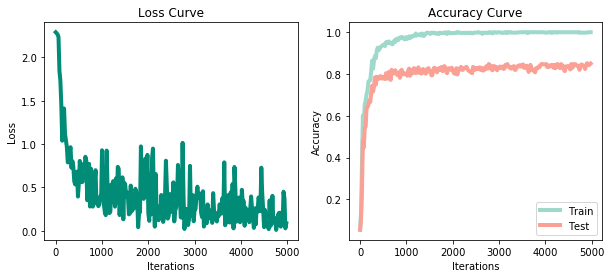

In [21]:
# Training on the newly network:
# Create Model Instance
model_improved = MNISTClassifier_improved(layer1_size=80, layer2_size=50, dropout=0.5)
print(model_improved)

# Train...
train_network(model_improved, mnist_train, mnist_test, num_epochs=200)

# 9. Bonuses:
## 9.1 Confusion Matrix

In [22]:
def get_confusion_matrix(model, test_data):
    # First we make sure we disable Gradient Computing
    torch.no_grad()
    
    # Model in Evaluation Mode
    model.eval()
    
    preds, actuals = [], []

    for image, label in mnist_test:
        # Add 1 more dimension for batching
        image = image.unsqueeze(0)
        out = model_improved(image)

        prediction = torch.max(out, dim=1)[1].item()
        preds.append(prediction)
        actuals.append(label)
    
    return sklearn.metrics.confusion_matrix(preds, actuals)

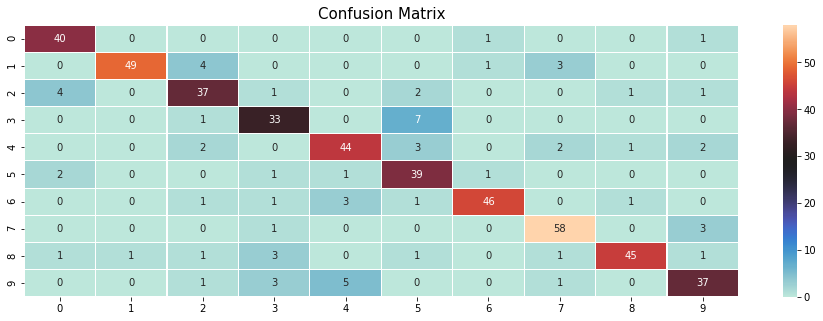

In [23]:
plt.figure(figsize=(16, 5))
sns.heatmap(get_confusion_matrix(model_improved, mnist_test), cmap='icefire', annot=True, linewidths=0.1)
plt.title('Confusion Matrix', fontsize=15);

# Other "How I taught myself Deep Learning" Notebooks
* [How I taught myself Deep Learning: ConvNet (CNNs)](https://www.kaggle.com/andradaolteanu/how-i-taught-myself-deep-learning-convnet-cnns)
* [How I taught myself Deep Learning: Recurrent NNs](https://www.kaggle.com/andradaolteanu/how-i-taught-myself-deep-learning-recurrent-nns)

If you have any questions, please do not hesitate to ask. This notebook is made to bring more clear understanding of concepts and coding, so this would also help me add, modify and improve it. 

<div class="alert alert-block alert-warning"> 
<p>If you liked this, upvote!</p>
<p>Cheers!</p>
</div>

# References:
* [Create your own FNN](http://alexlenail.me/NN-SVG/index.html)
* [WTF is a Tensor?](https://www.kdnuggets.com/2018/05/wtf-tensor.html)
* [What the hell is a Perceptron?](https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53)
* 3Blue1Brown videos:
    * [But what is a Neural Network?](https://www.youtube.com/watch?v=aircAruvnKk&t=1007s)
    * [What is Backpropagation really doing?](https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3)
    * [Gradient Descent, how Neural Networks learn](https://www.youtube.com/watch?v=IHZwWFHWa-w)
* [All `torch.` functions (including loss & optimizer functions)](https://pytorch.org/docs/stable/nn.html)
* [Impact of Learning Rate in NNs](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)